In [136]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import matplotlib as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pandas as pd
import numpy as np
import re
import nltk

import glob
import os
import zipfile
from scipy.sparse.linalg import svds
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

In [57]:

import pandas as pd
import glob
path = r'/home/ubuntu/Notebooks/data' # use your path
glued_data = pd.DataFrame()
for file_name in glob.glob(path+'*.csv'):
    x = pd.read_csv(file_name, low_memory=False)
    glued_data = pd.concat([glued_data,x],axis=0)
glued_data.head()


,streamerID,currentViews,streamCreatedTime,GameName,broadCasterID,broadCasterName,delaySetting,follwerNumber,partnerStatus,broadcasterLanguage,...,broadCasterName.1,delaySetting.1,follwerNumber.1,partnerStatus.1,broadcasterLanguage.1,totalViews.1,language.1,broadcastersCreatedTime.1,playBackBitRate.1,SourceResolution
0,12932973168,34846,2015-02-01T02:48:25Z,Dota 2,29578325,beyondthesummit,-1,197236,True,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12932549648,27293,2015-02-01T02:18:13Z,StarCraft II: Heart of the Swarm,30220059,esltv_sc2,-1,57446,True,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12935159760,18725,2015-02-01T05:42:20Z,Hearthstone: Heroes of Warcraft,29795919,nl_kripp,-1,407203,True,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12936016272,17817,2015-02-01T07:06:03Z,Dota 2,28633266,starladder3,-1,22098,True,ru,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12935229856,24142,2015-02-01T05:49:08Z,Dota 2,24954143,dotacinema,-1,63221,True,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
glued_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12497 entries, 0 to 12496
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   streamerID                   12497 non-null  int64  
 1    currentViews                12497 non-null  int64  
 2    streamCreatedTime           12497 non-null  object 
 3    GameName                    12496 non-null  object 
 4    broadCasterID               12497 non-null  int64  
 5    broadCasterName             12497 non-null  object 
 6    delaySetting                12497 non-null  int64  
 7    follwerNumber               12497 non-null  int64  
 8    partnerStatus               12497 non-null  object 
 9    broadcasterLanguage         12497 non-null  object 
 10   totalViews                  12497 non-null  int64  
 11   language                    12497 non-null  object 
 12   broadcastersCreatedTime     12497 non-null  object 
 13   playBackBitRate

In [59]:
columns= ['streamerID', 'currentViews', 'streamCreatedTime', 'GameName', 
           'broadCasterID', 'broadCasterName', 'delaySetting', 'followerNumber',
           'partnerStatus', 'broadcasterLanguage', 'totalViews', 'language', 
           'broadcastersCreatedTime', 'playBackBitRate', 'SourceResolution','NaN']
testdata = pd.read_csv(r'/home/ubuntu/Notebooks/data/all-2015-02-01-00-10-00.csv',sep = ',',names = columns, header=None)
df = pd.read_csv(r'/home/ubuntu/Notebooks/data/all-2015-03-07-23-55-00.csv', sep = ',',names = columns, header=None)

In [60]:
testdata.sample(10)

,streamerID,currentViews,streamCreatedTime,GameName,broadCasterID,broadCasterName,delaySetting,followerNumber,partnerStatus,broadcasterLanguage,totalViews,language,broadcastersCreatedTime,playBackBitRate,SourceResolution,NaN
1117,12935981552,16.0,2015-02-01T07:02:08Z,MapleStory,51497141.0,getitinkeaton,-1.0,799.0,-1,en,37627.0,en,2013-11-14T01:02:23Z,1895953.0,1920x1080,NaN
9399,12936458272,0.0,2015-02-01T08:01:17Z,FIFA 15,36120849.0,yes1w1ll,-1.0,1.0,-1,-1,2.0,ko,2012-09-11T23:33:42Z,2211937.0,-1,NaN
4664,12936370736,2.0,2015-02-01T07:49:44Z,FINAL FANTASY XIV: A Realm Reborn,46533401.0,aerynzael,-1.0,9.0,-1,-1,651.0,en,2013-07-24T02:32:46Z,146257.0,1280x720,NaN
1781,12933587344,9.0,2015-02-01T03:32:46Z,Devil May Cry 4,64263196.0,vashtsb,-1.0,138.0,-1,en,1442.0,en,2014-06-13T03:41:50Z,1148812.0,1280x720,NaN
3643,12936325728,3.0,2015-02-01T07:44:01Z,Starbound,24722782.0,themightysanfos,-1.0,61.0,-1,en,1400.0,en,2011-09-11T01:08:11Z,2120273.0,854x480,NaN
9586,12936420816,0.0,2015-02-01T07:56:15Z,Diablo III: Reaper of Souls,32341070.0,twistervb,-1.0,13.0,-1,-1,1861.0,ru,2012-07-22T14:38:32Z,-1.0,-1,NaN
10159,12936253920,0.0,2015-02-01T07:34:44Z,Minecraft,67486574.0,spacemancharles,-1.0,1.0,-1,-1,17.0,en,2014-07-28T02:20:07Z,2247492.0,1280x720,NaN
10422,12936153120,0.0,2015-02-01T07:22:05Z,Dying Light,81027059.0,smooth_upperlip,-1.0,9.0,-1,en,24.0,en,2015-01-27T04:05:11Z,1593875.0,1280x720,NaN
5955,12919743968,2.0,2015-01-31T13:15:53Z,iRacing.com,81188596.0,tboneracer,-1.0,3.0,-1,en,40.0,en,2015-01-29T02:43:22Z,-1.0,-1,NaN
1722,12935404624,8.0,2015-02-01T06:04:31Z,Warframe,30207043.0,drag154,-1.0,59.0,-1,en,702.0,en,2012-05-01T19:35:00Z,1034468.0,1280x720,NaN


In [61]:
df.head()

,streamerID,currentViews,streamCreatedTime,GameName,broadCasterID,broadCasterName,delaySetting,followerNumber,partnerStatus,broadcasterLanguage,totalViews,language,broadcastersCreatedTime,playBackBitRate,SourceResolution,NaN
0,13487643952,32684.0,2015-03-08T05:45:38Z,Hearthstone: Heroes of Warcraft,29795919.0,nl_kripp,-1.0,440792.0,True,en,106515857.0,en,2012-04-15T02:25:31Z,1956578.0,1280x720,NaN
1,13486798656,19308.0,2015-03-08T04:30:00Z,League of Legends,36794584.0,riotgames2,-1.0,102263.0,True,en,8792126.0,en,2012-10-09T22:28:27Z,1954820.0,1280x720,NaN
2,13487875936,16486.0,2015-03-08T06:08:52Z,The Yawhg,7951350.0,cryaotic,-1.0,394826.0,True,en,21750033.0,en,2009-08-25T18:36:55Z,3439187.0,1280x720,NaN
3,13484754480,13540.0,2015-03-08T01:55:58Z,League of Legends,14293484.0,voyboy,-1.0,483131.0,True,en,68402474.0,en,2010-08-02T02:21:41Z,2743296.0,1920x1080,NaN
4,13471054432,13102.0,2015-03-07T10:06:53Z,Game Dev Tycoon,36717908.0,izakooo,-1.0,193720.0,True,pl,16951906.0,pl,2012-10-07T01:10:28Z,2944484.0,1280x720,NaN


In [62]:
testdata[['currentViews', 'followerNumber']].sample(5)

,currentViews,followerNumber
172,244.0,19195.0
8775,0.0,-1.0
1936,8.0,376.0
3381,4.0,620.0
8347,1.0,28.0


<AxesSubplot:title={'center':'twitch data'}, xlabel='currentViews'>

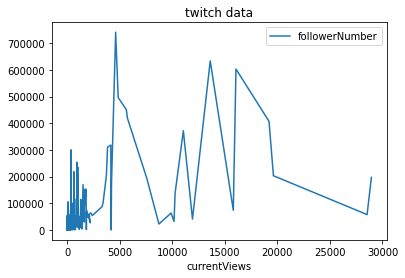

In [164]:
testdata.plot(y='followerNumber', x='currentViews', title="twitch data")

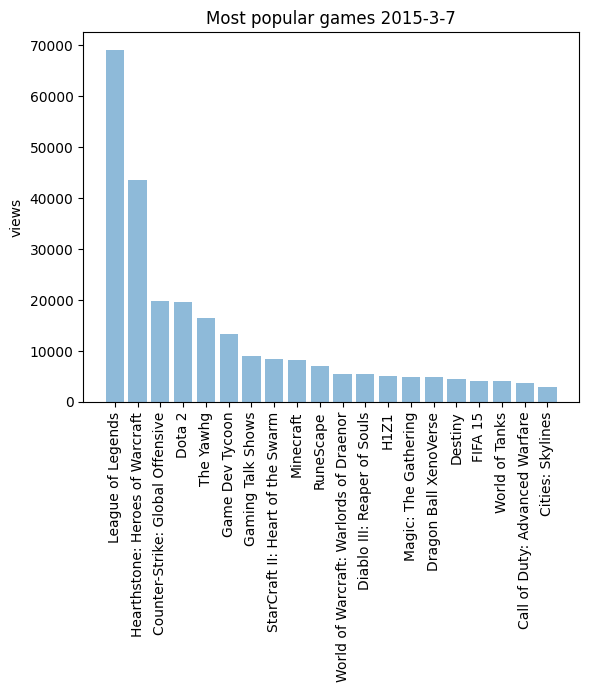

In [64]:
popular_games = df[['GameName','currentViews']].groupby('GameName').sum().reset_index()
popular_games_top_20 = popular_games.sort_values('currentViews', ascending=False).head(n=20)
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = (list(popular_games_top_20['GameName']))
y_pos = np.arange(len(objects))
performance = list(popular_games_top_20['currentViews'])
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('views')
plt.title('Most popular games 2015-3-7')
 
plt.show()

In [65]:
testdata['moving_average'] = testdata['currentViews'].rolling(window=3,
                                                        center=False).mean()

testdata[['currentViews','moving_average']].head(10)

,currentViews,moving_average
0,28948.0,NaN
1,28536.0,NaN
2,19630.0,25704.666667
3,19210.0,22458.666667
4,16065.0,18301.666667
5,15813.0,17029.333333
6,13618.0,15165.333333
7,11930.0,13787.000000
8,11061.0,12203.000000
9,10277.0,11089.333333


In [66]:
def game_title(game):
    return game.split('(')[0].strip()

In [67]:
def convert_to_int(s):
    return float(s) * 1000000

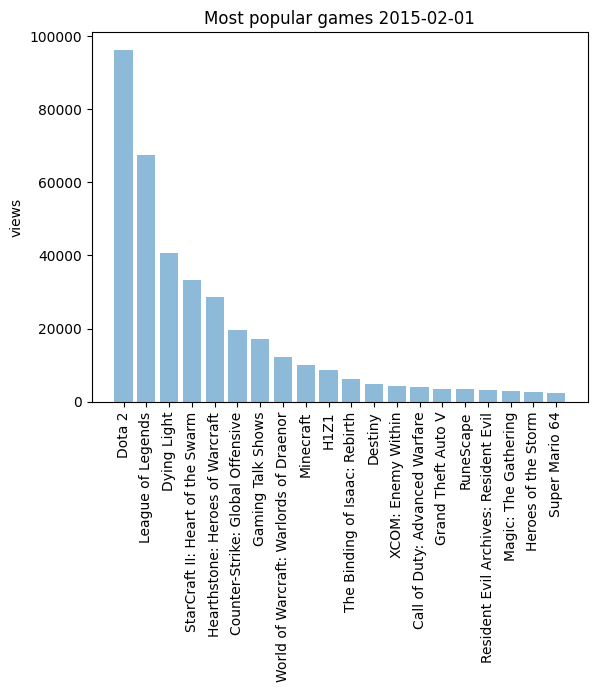

In [68]:
popular_games = testdata[['GameName','currentViews']].groupby('GameName').sum().reset_index()
popular_games_top_20 = popular_games.sort_values('currentViews', ascending=False).head(n=20)
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = (list(popular_games_top_20['GameName']))
y_pos = np.arange(len(objects))
performance = list(popular_games_top_20['currentViews'])
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('views')
plt.title('Most popular games 2015-02-01')
 
plt.show()

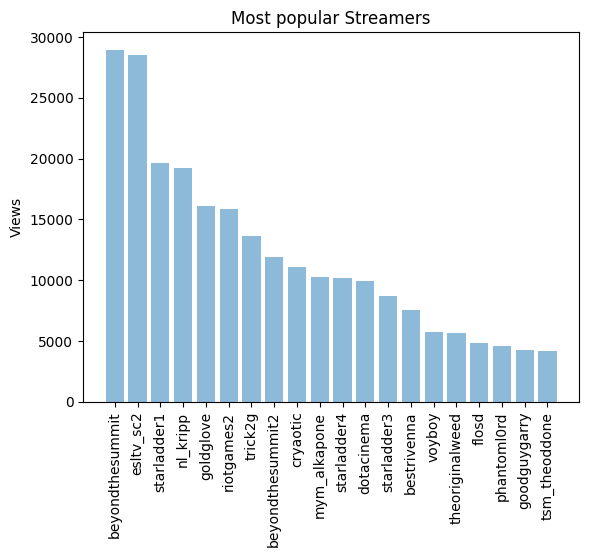

In [69]:

popular_streamers = testdata[['broadCasterName','currentViews']].groupby('broadCasterName').sum().reset_index()
popular_streamers_top_20 = testdata.sort_values('currentViews', ascending=False).head(n=20)

objects = (list(popular_streamers_top_20['broadCasterName']))
y_pos = np.arange(len(objects))
performance = list(popular_streamers_top_20['currentViews'])
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Views')
plt.title('Most popular Streamers')
 
plt.show()

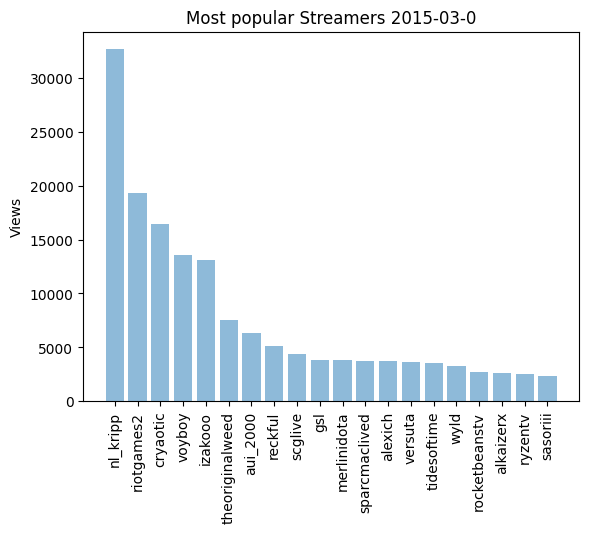

In [70]:
popular_streamers = df[['broadCasterName','currentViews']].groupby('broadCasterName').sum().reset_index()
popular_streamers_top_20 = popular_streamers.sort_values('currentViews', ascending=False).head(n=20)

objects = (list(popular_streamers_top_20['broadCasterName']))
y_pos = np.arange(len(objects))
performance = list(popular_streamers_top_20['currentViews'])
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Views')
plt.title('Most popular Streamers 2015-03-0')
 
plt.show()

In [73]:
testdata['currentViews'].describe().transpose()

count    12273.000000
mean        35.704229
std        579.056126
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max      28948.000000
Name: currentViews, dtype: float64

In [74]:
print('Minimum views is: %d' %(testdata.currentViews.min()))
print('Maximum views is: %d' %(testdata.currentViews.max()))

Minimum views is: 0
Maximum views is: 28948


In [75]:
print('Number of missing values across columns: \n',testdata.isnull().sum())

Number of missing values across columns: 
 streamerID                     0
currentViews                  13
streamCreatedTime             13
GameName                      13
broadCasterID                 13
broadCasterName               13
delaySetting                  13
followerNumber                13
partnerStatus                 13
broadcasterLanguage           13
totalViews                    13
language                      13
broadcastersCreatedTime       13
playBackBitRate               13
SourceResolution              13
NaN                        12286
moving_average                41
dtype: int64


/home/ubuntu/.local/lib/python3.6/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/ubuntu/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


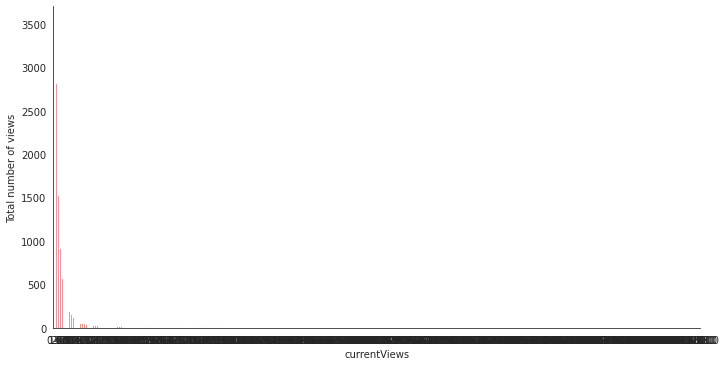

In [126]:
with sns.axes_style('white'):
    g = sns.factorplot("currentViews", data=testdata, aspect=2.0,kind='count')
    g.set_ylabels("Total number of views")

In [142]:
counts=testdata.broadCasterName.value_counts()
electronics_df1_final=testdata[testdata.broadCasterName.isin(counts[counts>=15].index)]
print('Number of users who have rated 25 or more items =', len(electronics_df1_final))
print('Number of unique users in the final data = ', electronics_df1_final['broadCasterName'].nunique())
print('Number of unique products in the final data = ', electronics_df1_final['broadCasterName'].nunique())

Number of users who have rated 25 or more items = 0
Number of unique users in the final data =  0
Number of unique products in the final data =  0


In [149]:
most_rated=testdata.groupby('currentViews').size().sort_values(ascending=False)[:10]
print('Top 10 users based on ratings: \n',most_rated)

Top 10 users based on ratings: 
 currentViews
0.0     3526
1.0     2824
2.0     1526
3.0      922
4.0      570
5.0      386
6.0      301
7.0      223
8.0      190
9.0      162
10.0     125
dtype: int64


In [154]:
final_ratings_matrix = electronics_df1_final.pivot_table(index = 'broadCasterName', columns ='streamerID', values='currentViews').fillna(0)
final_ratings_matrix.head()

broadCasterName


In [155]:

print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

Shape of final_ratings_matrix:  (0, 0)


In [81]:
train_data, test_data = train_test_split(testdata, test_size = 0.3, random_state=0)
train_data.head()

,streamerID,currentViews,streamCreatedTime,GameName,broadCasterID,broadCasterName,delaySetting,followerNumber,partnerStatus,broadcasterLanguage,totalViews,language,broadcastersCreatedTime,playBackBitRate,SourceResolution,NaN,moving_average
3749,12936179648,3.0,2015-02-01T07:25:31Z,Dying Light,39787614.0,taweretsshadow,-1.0,530.0,-1,en,18118.0,en,2013-01-28T22:26:33Z,1765820.0,1536x864,NaN,3.0
1536,12935945280,10.0,2015-02-01T06:57:56Z,Guild Wars 2,27601586.0,kikboxin12,-1.0,35.0,-1,en,1584.0,en,2012-01-20T17:10:22Z,970453.0,1364x768,NaN,10.0
5136,12935983424,2.0,2015-02-01T07:02:21Z,Dota 2,43233861.0,fishoustuna,-1.0,37.0,-1,en,1044.0,en,2013-05-05T19:07:41Z,1075468.0,1024x624,NaN,2.0
11589,12935002176,0.0,2015-02-01T05:27:13Z,League of Legends,77831012.0,elporoloco,-1.0,2.0,-1,en,117.0,en,2014-12-23T21:04:49Z,2920773.0,1920x1200,NaN,0.0
5143,12935975824,2.0,2015-02-01T07:01:27Z,Marvel vs. Capcom 2: New Age of Heroes,40589208.0,lawrenceterra,-1.0,7.0,-1,en,137.0,en,2013-02-22T06:53:43Z,1498625.0,1280x720,NaN,2.0


In [82]:

print('Shape of training data: ',train_data.shape)
print('Shape of testing data: ',test_data.shape)

Shape of training data:  (8600, 17)
Shape of testing data:  (3686, 17)


In [134]:
train_data_grouped = train_data.groupby('streamerID').agg({'GameName': 'count'}).reset_index()
train_data_grouped.rename(columns = {'GameName': 'score'},inplace=True)
train_data_grouped.head(40)

,streamerID,score
0,12853885520,1
1,12868973984,1
2,12875602864,1
3,12877721872,1
4,12878839344,1
5,12879357744,1
6,12881333328,1
7,12882965888,1
8,12884619968,1
9,12886031552,1


In [135]:
train_data_sort = train_data_grouped.sort_values(['score', 'streamerID'], ascending = [1,-1]) 
      
#Generate a recommendation rank based upon score 
train_data_sort['rank'] = train_data_sort['score'].rank(ascending=1, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(5) 
popularity_recommendations

,streamerID,score,rank
293,"12928945184,0,2015-01-31T22:24:43Z,Yu-gi-oh! ,...",0,1.0
1579,"12934217648,1,2015-02-01T04:20:49Z,Warhammer 4...",0,2.0
1884,"12934627056,1,2015-02-01T04:54:21Z,Smite (32-b...",0,3.0
2368,"12934997616,4,2015-02-01T05:26:48Z,Ys V: Lost ...",0,4.0
2389,"12935010048,1,2015-02-01T05:27:54Z,Smite (32-b...",0,5.0


In [167]:
def recommend(GameName):     
    user_recommendations = popularity_recommendations 
          
   
    user_recommendations['StreamerID'] = GameName 
      
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations

In [169]:
find_recom = [10,100,150]   # This list is user choice.
for i in find_recom:
    print("The list of recommendations for the user: %d\n" %(i))
    print(recommend(i))    
    print("\n")

The list of recommendations for the user: 10

      StreamerID                                         streamerID  score  \
293           10  12928945184,0,2015-01-31T22:24:43Z,Yu-gi-oh! ,...      0   
1579          10  12934217648,1,2015-02-01T04:20:49Z,Warhammer 4...      0   
1884          10  12934627056,1,2015-02-01T04:54:21Z,Smite (32-b...      0   
2368          10  12934997616,4,2015-02-01T05:26:48Z,Ys V: Lost ...      0   
2389          10  12935010048,1,2015-02-01T05:27:54Z,Smite (32-b...      0   

      rank  
293    1.0  
1579   2.0  
1884   3.0  
2368   4.0  
2389   5.0  


The list of recommendations for the user: 100

      StreamerID                                         streamerID  score  \
293          100  12928945184,0,2015-01-31T22:24:43Z,Yu-gi-oh! ,...      0   
1579         100  12934217648,1,2015-02-01T04:20:49Z,Warhammer 4...      0   
1884         100  12934627056,1,2015-02-01T04:54:21Z,Smite (32-b...      0   
2368         100  12934997616,4,2015-02-01T05:

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [101]:
electronics_df_CF = pd.concat([train_data, test_data]).reset_index()
electronics_df_CF.head()

,index,streamerID,currentViews,streamCreatedTime,GameName,broadCasterID,broadCasterName,delaySetting,followerNumber,partnerStatus,broadcasterLanguage,totalViews,language,broadcastersCreatedTime,playBackBitRate,SourceResolution,NaN,moving_average
0,3749,12936179648,3.0,2015-02-01T07:25:31Z,Dying Light,39787614.0,taweretsshadow,-1.0,530.0,-1,en,18118.0,en,2013-01-28T22:26:33Z,1765820.0,1536x864,NaN,3.0
1,1536,12935945280,10.0,2015-02-01T06:57:56Z,Guild Wars 2,27601586.0,kikboxin12,-1.0,35.0,-1,en,1584.0,en,2012-01-20T17:10:22Z,970453.0,1364x768,NaN,10.0
2,5136,12935983424,2.0,2015-02-01T07:02:21Z,Dota 2,43233861.0,fishoustuna,-1.0,37.0,-1,en,1044.0,en,2013-05-05T19:07:41Z,1075468.0,1024x624,NaN,2.0
3,11589,12935002176,0.0,2015-02-01T05:27:13Z,League of Legends,77831012.0,elporoloco,-1.0,2.0,-1,en,117.0,en,2014-12-23T21:04:49Z,2920773.0,1920x1200,NaN,0.0
4,5143,12935975824,2.0,2015-02-01T07:01:27Z,Marvel vs. Capcom 2: New Age of Heroes,40589208.0,lawrenceterra,-1.0,7.0,-1,en,137.0,en,2013-02-22T06:53:43Z,1498625.0,1280x720,NaN,2.0


In [105]:
pivot_df = electronics_df_CF.pivot(index = 'GameName', columns ='streamerID', values = 'currentViews').fillna(0)
pivot_df.head()

streamerID,12749764544,12804341504,12821263376,12853885520,12868973984,12875602864,12877721872,12878839344,12879357744,12881333328,...,12936520752,12936521616,12936521808,12936521936,"12936522096,1,2015-02-01T08:09:42Z,YOGBOX, MINECRAFT,81504029,playglive,-1,-1,-1,pl,-1,pl,2015-02-01T07:14:21Z,-1,-1,",12936522144,12936522272,12936522432,12936522464,12936522784
GameName,,,,,,,,,,,,,,,,,,,,,
NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
League of Legends,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#IDARB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#killallzombies,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
pivot_df['user_index'] = np.arange(0, pivot_df.shape[0], 1)
pivot_df.head()

streamerID,12749764544,12804341504,12821263376,12853885520,12868973984,12875602864,12877721872,12878839344,12879357744,12881333328,...,12936521616,12936521808,12936521936,"12936522096,1,2015-02-01T08:09:42Z,YOGBOX, MINECRAFT,81504029,playglive,-1,-1,-1,pl,-1,pl,2015-02-01T07:14:21Z,-1,-1,",12936522144,12936522272,12936522432,12936522464,12936522784,user_index
GameName,,,,,,,,,,,,,,,,,,,,,
NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
League of Legends,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
#IDARB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
#killallzombies,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [107]:
pivot_df.set_index(['user_index'], inplace=True)
# Actual ratings given by users
pivot_df.head()

streamerID,12749764544,12804341504,12821263376,12853885520,12868973984,12875602864,12877721872,12878839344,12879357744,12881333328,...,12936520752,12936521616,12936521808,12936521936,"12936522096,1,2015-02-01T08:09:42Z,YOGBOX, MINECRAFT,81504029,playglive,-1,-1,-1,pl,-1,pl,2015-02-01T07:14:21Z,-1,-1,",12936522144,12936522272,12936522432,12936522464,12936522784
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
U, sigma, Vt = svds(pivot_df, k = 10)

In [111]:
print('Left singular matrix: \n',U)


Left singular matrix: 
 [[-1.83504701e-18  2.75925620e-18  1.21813671e-18 ... -3.41423178e-18
  -2.43769436e-18  4.88895559e-18]
 [-3.09344358e-21  5.76216616e-21  4.28873713e-21 ... -7.79626275e-21
  -5.43984757e-21  1.09366439e-20]
 [-2.19785539e-18  3.93488158e-18 -4.85438138e-18 ...  4.85961213e-18
   5.48818884e-18 -1.21793459e-17]
 ...
 [ 4.09593545e-18 -6.28570050e-18 -3.74677324e-18 ...  8.24131629e-18
   5.94360855e-18 -1.21354690e-17]
 [-4.26890555e-19  6.52886176e-19  4.13965259e-19 ... -9.36083482e-19
  -6.72630980e-19  1.36618518e-18]
 [ 9.91969306e-19 -1.51610087e-18 -8.65564762e-19 ...  2.09281927e-18
   1.45413408e-18 -2.79818431e-18]]


In [112]:

print('Sigma: \n',sigma)

Sigma: 
 [ 4295.92330006  4323.69344427  4692.98423181  7740.05975429
 11002.91406855 19472.05664536 20186.16308267 23600.47406304
 28600.72154684 40617.86814937]


In [113]:
sigma = np.diag(sigma)
print('Diagonal matrix: \n',sigma)

Diagonal matrix: 
 [[ 4295.92330006     0.             0.             0.
      0.             0.             0.             0.
      0.             0.        ]
 [    0.          4323.69344427     0.             0.
      0.             0.             0.             0.
      0.             0.        ]
 [    0.             0.          4692.98423181     0.
      0.             0.             0.             0.
      0.             0.        ]
 [    0.             0.             0.          7740.05975429
      0.             0.             0.             0.
      0.             0.        ]
 [    0.             0.             0.             0.
  11002.91406855     0.             0.             0.
      0.             0.        ]
 [    0.             0.             0.             0.
      0.         19472.05664536     0.             0.
      0.             0.        ]
 [    0.             0.             0.             0.
      0.             0.         20186.16308267     0.
      0.           

In [114]:
print('Right singular matrix: \n',Vt)

Right singular matrix: 
 [[ 0.00000000e+00  6.12465834e-21  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -8.31846787e-21  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -5.20668345e-21  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  2.62953774e-21  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.70980616e-21  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.40470775e-21  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [115]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
# Convert predicted ratings to dataframe
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot_df.columns)
preds_df.head()

streamerID,12749764544,12804341504,12821263376,12853885520,12868973984,12875602864,12877721872,12878839344,12879357744,12881333328,...,12936520752,12936521616,12936521808,12936521936,"12936522096,1,2015-02-01T08:09:42Z,YOGBOX, MINECRAFT,81504029,playglive,-1,-1,-1,pl,-1,pl,2015-02-01T07:14:21Z,-1,-1,",12936522144,12936522272,12936522432,12936522464,12936522784
0,0.0,-1.184807e-33,0.0,4.953823e-33,3.874499e-34,0.0,-5.352957e-16,-8.220993e-34,3.812869e-33,0.0,...,-1.018401e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,-2.632655e-36,0.0,9.849132e-36,8.545903e-37,0.0,-1.117860e-18,-1.806310e-36,7.346962e-36,0.0,...,-1.846139e-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,2.055803e-33,0.0,1.404330e-32,-5.801261e-34,0.0,-7.633670e-16,1.260464e-33,5.665394e-33,0.0,...,2.011161e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,2.762103e-33,0.0,-1.211494e-32,-9.057417e-34,0.0,1.215555e-15,1.915247e-33,-9.797814e-33,0.0,...,1.974939e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,-1.755576e-34,0.0,-4.917458e-33,3.583339e-35,0.0,4.085191e-16,-8.159668e-35,-2.045458e-33,0.0,...,-2.025874e-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
def recommend_items(userID, pivot_df, preds_df, num_recommendations):
    # index starts at 0  
    user_idx = userID-1 
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions
    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

In [117]:
userID = 4
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 4):

                   user_ratings  user_predictions
Recommended Items                                
12932973168                 0.0      3.242589e-13
12932994272                 0.0      2.198840e-13
12932549648                 0.0      1.681116e-13
12933578608                 0.0      1.336330e-13
12933757376                 0.0      1.139857e-13


In [118]:

userID = 6
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 6):

                   user_ratings  user_predictions
Recommended Items                                
12932973168                 0.0      1.127040e-13
12932994272                 0.0      7.642601e-14
12932549648                 0.0      4.705614e-14
12933578608                 0.0      4.644739e-14
12933757376                 0.0      3.961850e-14


In [119]:
userID = 8
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 8):

                   user_ratings  user_predictions
Recommended Items                                
12932973168                 0.0      9.298860e-14
12932994272                 0.0      6.305673e-14
12932549648                 0.0      4.415435e-14
12933578608                 0.0      3.832230e-14
12933757376                 0.0      3.268799e-14


In [121]:
preds_df.head()

streamerID,12749764544,12804341504,12821263376,12853885520,12868973984,12875602864,12877721872,12878839344,12879357744,12881333328,...,12936520752,12936521616,12936521808,12936521936,"12936522096,1,2015-02-01T08:09:42Z,YOGBOX, MINECRAFT,81504029,playglive,-1,-1,-1,pl,-1,pl,2015-02-01T07:14:21Z,-1,-1,",12936522144,12936522272,12936522432,12936522464,12936522784
0,0.0,-1.184807e-33,0.0,4.953823e-33,3.874499e-34,0.0,-5.352957e-16,-8.220993e-34,3.812869e-33,0.0,...,-1.018401e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,-2.632655e-36,0.0,9.849132e-36,8.545903e-37,0.0,-1.117860e-18,-1.806310e-36,7.346962e-36,0.0,...,-1.846139e-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,2.055803e-33,0.0,1.404330e-32,-5.801261e-34,0.0,-7.633670e-16,1.260464e-33,5.665394e-33,0.0,...,2.011161e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,2.762103e-33,0.0,-1.211494e-32,-9.057417e-34,0.0,1.215555e-15,1.915247e-33,-9.797814e-33,0.0,...,1.974939e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,-1.755576e-34,0.0,-4.917458e-33,3.583339e-35,0.0,4.085191e-16,-8.159668e-35,-2.045458e-33,0.0,...,-2.025874e-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
preds_df.mean().head()

streamerID
12749764544    0.000000e+00
12804341504    1.788189e-19
12821263376    0.000000e+00
12853885520    4.702414e-19
12868973984   -5.135336e-20
dtype: float64

In [125]:
userID = 9
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 9):

                   user_ratings  user_predictions
Recommended Items                                
12934530544                 0.0      4.671558e-14
12931574736                 0.0      4.023099e-14
12932065776                 0.0      2.241686e-14
12936030864                 0.0      1.697217e-14
12934711488                 0.0      1.249648e-14
